## Suitable Title

### Introduction

--- TO DO ---

### Wellness Data
(<b>Notebook</b>:[WellnessMeasure.ipynb](https://nbviewer.jupyter.org/github/weilixiang/sta2453_project1/blob/master/WellnessMeasure.ipynb))<br>

The original wellness data of athletes consists of 19 columns, of which there were 11 quantitative measures and 6 qualitative measures with the other two columns being Date and PlayerID. Our aim for this dataset is to come up with a quantitative  summary measure(s). For understanding what each variable means, please refer to the [CodeBook](https://www.dropbox.com/s/c5v4hig2afq881h/3.%20DataFest%202019%20-%20Codebook.xlsx?dl=0). 

<b>Note:</b> We decided to take two routes. One was that of factor analysis which can be found at the notebook over here: [Wellness-FactorAnlaysis.ipynb](https://nbviewer.jupyter.org/github/weilixiang/sta2453_project1/blob/master/Wellness%20-%20Factor%20Analysis.ipynb) and the other which we are going to describe in this report. The one we describe over here turns out to be better in terms of summary measures being less correlated. The approach followed was to try to come up with one quantitative value and keep the categorical variables intact.

For complete understanding as to how we cleaned the data, please refer to this notebook: [WellnessMeasure.ipynb](https://nbviewer.jupyter.org/github/weilixiang/sta2453_project1/blob/master/WellnessMeasure.ipynb). In this notebook, we add all the quantitative values after scaling them from 1-7 and come up with a <b>WellnessScore</b>. But we soon realize that the data we had wasn't completely independent. Intuitively, doesn't our wellness today depend on how we felt yesterday or even a week before? So, we define a new score by applying exponential moving average to the WellnessScore. Now, each player's <b>'EWMScore'</b> will depend on a week of WellnessScores with exponentially decreasing weights as me move further back in time. The dataset looks like this:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dfWell = pd.read_csv('https://raw.githubusercontent.com/weilixiang/sta2453_project1/master/Clean%20Data/WellnessMeasure.csv')
dfWell

,Date,PlayerID,Pain,Illness,Menstruation,Nutrition,NutritionAdjustment,WellnessScore,EWMScore
0,2017-08-01,14,No,No,No,Okay,Yes,34.000000,34.000000
1,2017-08-01,2,No,No,No,Excellent,Yes,35.824138,35.824138
2,2017-08-01,3,No,No,No,Excellent,Yes,30.000000,30.000000
3,2017-08-01,5,No,No,No,Excellent,Yes,31.596552,31.596552
4,2017-08-01,13,No,No,No,Okay,Yes,29.862069,29.862069
...,...,...,...,...,...,...,...,...,...
5006,2018-07-21,14,No,No,No,Excellent,Yes,28.206897,28.557073
5007,2018-07-21,15,No,No,No,Excellent,Yes,34.837931,35.176056
5008,2018-07-21,16,No,No,No,Okay,Yes,25.000000,26.956113
5009,2018-07-21,10,No,Slightly Off,No,Excellent,Yes,22.993103,24.044602


Let us visualize the scores so that we can see what this actually means. The comparison of WellnessScore and EWMScore for Player with ID 1 is as follows:

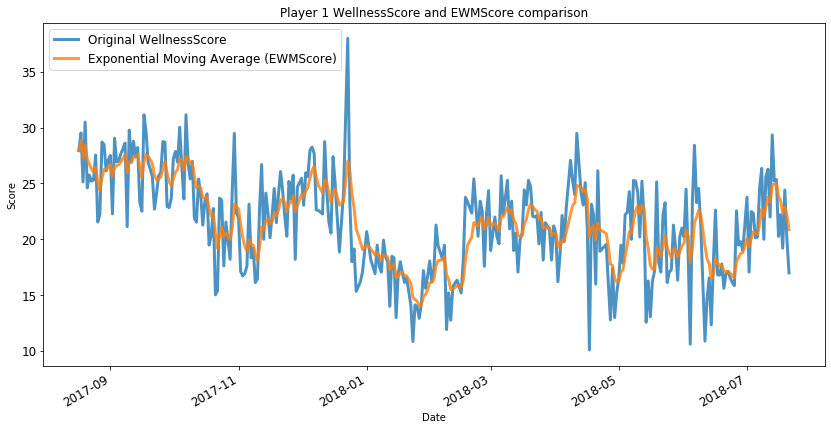

In [3]:
# Let us visualize the wellness and EWM scores of Player 1
Player1 = dfWell[dfWell.PlayerID == 1]
plt.figure(figsize=(14, 7))
# Convert the Date column to a pandas datetime object so that the axis labels get rendered properly
Player1.index = pd.to_datetime(Player1['Date'])
plt.plot(Player1.WellnessScore, lw=3, alpha=0.8, label='Original WellnessScore')
plt.plot(Player1.EWMScore, lw=3, alpha=0.8, label='Exponential Moving Average (EWMScore)')
plt.title('Player 1 WellnessScore and EWMScore comparison')
plt.xlabel('Date')
plt.ylabel('Score')
plt.tick_params(labelsize=12)
plt.legend(loc='upper left', fontsize=12)
plt.gcf().autofmt_xdate()
plt.show()

### Training Load Data

-- TODO --

### Performance Measure (GPS Dataset)
(<b>Notebook</b>:[PerformanceMeasure.ipynb](https://nbviewer.jupyter.org/github/weilixiang/sta2453_project1/blob/master/PerformanceMeasure.ipynb))<br>

The aim for this dataset is to find a single performance measure per game for each player. We first thought of having a measure of a highest acceleration value per player, but it didn't show much variation and all the players performance seemed to be very similar. 

We then came up with the idea of having a <b>PerformanceScore</b>, which was a score on the scale of 0-100 and would be calculated in the following manner:<br>
<ol>
    <li>Find out the frame of highest speed within each game for each player</li>
    <li>Find the corresponding maximum values of accelLoad and accelImpulse if there are multiple frames with highest speed</li>
    <li>Give Speed, AccelLoad and AccelImpulse equal weights and scale the score to 100.</li>
</ol>

We were also curious to see if the outcome of the game or the points difference had any impact on the players. We wanted to know if players perform better when their team is under pressure with a large points difference and if players performance better or worse when the team is winning or losing. So we added those measures into the dataset using the games data as well. Our final dataset looked like this:

In [4]:
performance = pd.read_csv('https://raw.githubusercontent.com/weilixiang/sta2453_project1/master/Clean%20Data/' +
                          'PerformanceMeasure.csv')
performance

,GameID,Date,PlayerID,AccelImpulse,AccelLoad,Speed,PerformanceScore,Outcome,PointsDiff
0,1,2017-11-30,2,0.524367,0.264378,0.754193,51.431257,W,19
1,2,2017-11-30,2,0.524367,0.264378,0.754193,51.431257,W,31
2,3,2017-11-30,2,0.524367,0.264378,0.754193,51.431257,W,17
3,1,2017-11-30,3,0.452520,0.333518,0.753256,51.309794,W,19
4,2,2017-11-30,3,0.452520,0.333518,0.753256,51.309794,W,31
...,...,...,...,...,...,...,...,...,...
477,38,2018-07-21,14,0.726193,0.175328,0.429952,44.382406,W,12
478,37,2018-07-21,15,0.492349,0.255042,0.514388,42.059287,L,-12
479,38,2018-07-21,15,0.492349,0.255042,0.514388,42.059287,W,12
480,37,2018-07-21,16,0.173717,0.233874,0.476721,29.477054,L,-12


The PerformanceScore we came up with looks decent with values ranging from 17 all the way up to 80. The distribution is as follows:

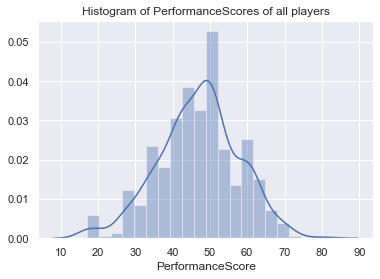

In [5]:
sns.set()
sns.distplot(performance.PerformanceScore)
plt.title('Histogram of PerformanceScores of all players')
plt.show()

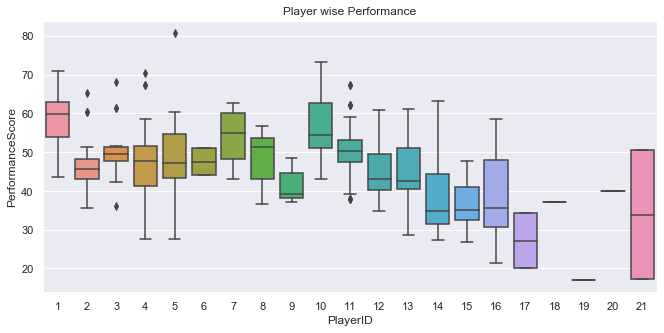

In [6]:
fig, ax = plt.subplots(figsize=(11,5))
sns.boxplot(x="PlayerID", y="PerformanceScore", data=performance)
plt.title('Player wise Performance')
plt.show()